<a href="https://colab.research.google.com/github/MasahitoKatsuki/RabbitChallenge/blob/main/20210627%E3%83%AD%E3%82%B8%E3%82%B9%E3%83%86%E3%82%A3%E3%83%83%E3%82%AF%E5%9B%9E%E5%B8%B0%E3%83%8F%E3%83%B3%E3%82%BA%E3%82%AA%E3%83%B3%E8%AA%B2%E9%A1%8C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#データの表示、取得
#from モジュール名 import クラス名（もしくは関数名や変数名）
import pandas as pd
from pandas import DataFrame
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#matplotlibをinlineで表示するためのおまじない (plt.show()しなくていい)
%matplotlib inline


In [ ]:
# titanic data csvファイルの読み込み
titanic_df = pd.read_csv('/content/drive/My Drive/study_ai_ml/data/titanic_train.csv')


In [ ]:
#性別を名義変数科 男が１
titanic_df['Sex'] = titanic_df['Sex'].map({'female': 0, 'male': 1}).astype(int)  

In [ ]:
# ファイルの先頭部を表示し、データセットを確認する
titanic_df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
#予測に不要と考えるカラムをドロップ (本当はここの情報もしっかり使うべきだと思っています)
titanic_df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

#一部カラムをドロップしたデータを表示
titanic_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,S
1,1,1,0,38.0,1,0,71.2833,C
2,1,3,0,26.0,0,0,7.9250,S
3,1,1,0,35.0,1,0,53.1000,S
4,0,3,1,35.0,0,0,8.0500,S


In [ ]:
#nullを含んでいる行を表示
titanic_df[titanic_df.isnull().any(1)].head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,AgeFill
5,0,3,1,NaN,0,0,8.4583,Q,29.699118
17,1,2,1,NaN,0,0,13.0000,S,29.699118
19,1,3,0,NaN,0,0,7.2250,C,29.699118
26,0,3,1,NaN,0,0,7.2250,C,29.699118
28,1,3,0,NaN,0,0,7.8792,Q,29.699118
29,0,3,1,NaN,0,0,7.8958,S,29.699118
31,1,1,0,NaN,1,0,146.5208,C,29.699118
32,1,3,0,NaN,0,0,7.7500,Q,29.699118
36,1,3,1,NaN,0,0,7.2292,C,29.699118
42,0,3,1,NaN,0,0,7.8958,C,29.699118


In [ ]:
#Ageカラムのnullを平均値で補完

titanic_df['AgeFill'] = titanic_df['Age'].fillna(titanic_df['Age'].mean())

#再度nullを含んでいる行を表示 (Ageのnullは補完されている)
titanic_df[titanic_df.isnull().any(1)]

#titanic_df.dtypes

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,AgeFill
5,0,3,1,NaN,0,0,8.4583,Q,29.699118
17,1,2,1,NaN,0,0,13.0000,S,29.699118
19,1,3,0,NaN,0,0,7.2250,C,29.699118
26,0,3,1,NaN,0,0,7.2250,C,29.699118
28,1,3,0,NaN,0,0,7.8792,Q,29.699118
...,...,...,...,...,...,...,...,...,...
859,0,3,1,NaN,0,0,7.2292,C,29.699118
863,0,3,0,NaN,8,2,69.5500,S,29.699118
868,0,3,1,NaN,0,0,9.5000,S,29.699118
878,0,3,1,NaN,0,0,7.8958,S,29.699118


In [ ]:
#ロジスティック回帰課題
#性別と年齢から予測する
#性別と年齢だけのリストを作成
data1 = titanic_df.loc[:, ["AgeFill","Sex"]].values
print(data1)

[[22.          1.        ]
 [38.          0.        ]
 [26.          0.        ]
 ...
 [29.69911765  0.        ]
 [26.          1.        ]
 [32.          1.        ]]


In [ ]:
#生死フラグのみのリストを作成
label1 =  titanic_df.loc[:,["Survived"]].values
print(label1).head(5)

In [ ]:
from sklearn.linear_model import LogisticRegression


In [ ]:
model = LogisticRegression()


In [ ]:
model.fit(data1, label1)
#すでにここで正則化が入っている、勾配降下法を用いてパラメータを決めている。

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

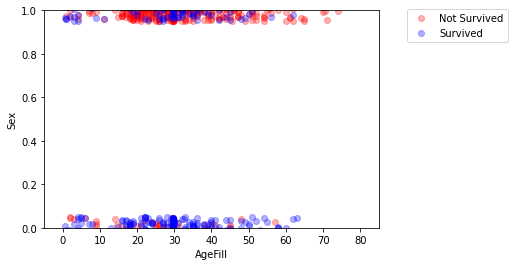

In [ ]:
np.random.seed = 0

xmin, xmax = -5, 85
ymin, ymax = 0.0, 1.0

index_survived = titanic_df[titanic_df["Survived"]==0].index
index_notsurvived = titanic_df[titanic_df["Survived"]==1].index

from matplotlib.colors import ListedColormap
fig, ax = plt.subplots()
cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])
sc = ax.scatter(titanic_df.loc[index_survived, 'AgeFill'],
                titanic_df.loc[index_survived, 'Sex']+(np.random.rand(len(index_survived))-0.5)*0.1,
                color='r', label='Not Survived', alpha=0.3)
sc = ax.scatter(titanic_df.loc[index_notsurvived, 'AgeFill'],
                titanic_df.loc[index_notsurvived, 'Sex']+(np.random.rand(len(index_notsurvived))-0.5)*0.1,
                color='b', label='Survived', alpha=0.3)
ax.set_xlabel('AgeFill')
ax.set_ylabel('Sex')
ax.set_xlim(xmin, xmax)
ax.set_ylim(ymin, ymax)
ax.legend(bbox_to_anchor=(1.4, 1.03))

In [ ]:
model.predict([[30,1]])　#課題の答え　３０歳男性は生存した

array([0])

In [ ]:
#生存確率
model.predict_proba([[30,1]])
#助かる確率は81%ほど

array([[0.80668102, 0.19331898]])